### EDA
Realizamos un análisis exploratorio de datos

In [25]:
import sys, platform
print("Python:", sys.executable)
print("Version:", sys.version)
print("OS:", platform.platform())

Python: /usr/local/bin/python3.13
Version: 3.13.3 (v3.13.3:6280bb54784, Apr  8 2025, 10:47:54) [Clang 15.0.0 (clang-1500.3.9.4)]
OS: macOS-15.6-arm64-arm-64bit-Mach-O


In [26]:
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "pandas", "pyarrow", "fastparquet"])



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: /usr/local/bin/python3.13 -m pip install --upgrade pip


0

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Carga y vista general
train = pd.read_parquet('train.parquet')
print('Shape:', train.shape)
print('Column types:')
print(train.dtypes.value_counts())
display(train.head())

# Separar columnas numéricas y categóricas
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = train.select_dtypes(exclude=[np.number]).columns.tolist()
print('Numéricas:', num_cols)
print('Categóricas:', cat_cols)


Shape: (307511, 388)
Column types:
float64    331
int64       41
object      16
Name: count, dtype: int64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CCB_AMT_RECEIVABLE_PRINCIPAL_MEAN,CCB_AMT_RECIVABLE_MEAN,CCB_AMT_TOTAL_RECEIVABLE_MEAN,CCB_CNT_DRAWINGS_ATM_CURRENT_MEAN,CCB_CNT_DRAWINGS_CURRENT_MEAN,CCB_CNT_DRAWINGS_OTHER_CURRENT_MEAN,CCB_CNT_DRAWINGS_POS_CURRENT_MEAN,CCB_CNT_INSTALMENT_MATURE_CUM_MEAN,CCB_SK_DPD_MEAN,CCB_SK_DPD_DEF_MEAN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Numéricas: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_M

#### 2. Análisis de la variable TARGET

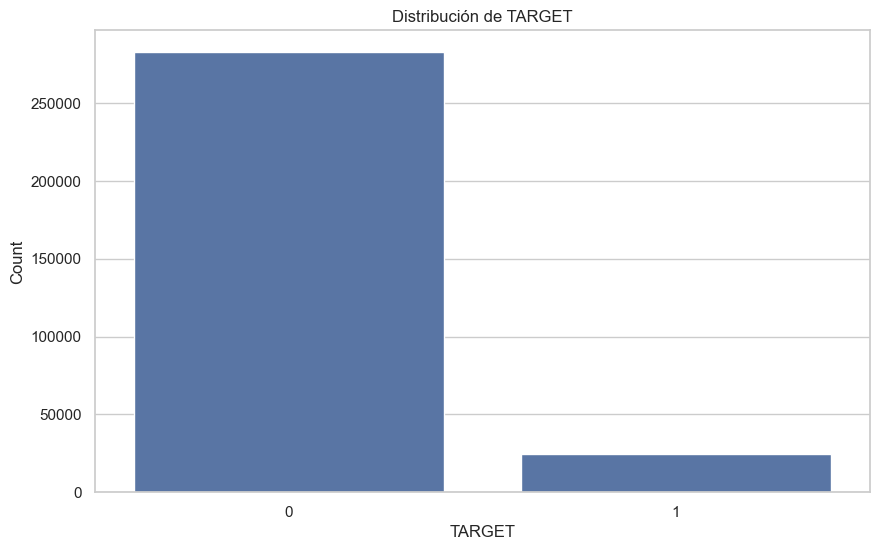

Counts:
 TARGET
0    282686
1     24825
Name: count, dtype: int64
Percentages:
 TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [28]:
# Distribución de TARGET
sns.countplot(x='TARGET', data=train)
plt.title('Distribución de TARGET')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

# Proporciones
target_counts = train['TARGET'].value_counts()
target_percent = train['TARGET'].value_counts(normalize=True) * 100
print('Counts:\n', target_counts)
print('Percentages:\n', target_percent)



#### 3. Valores faltantes y anomalías

                                     missing_pct
CCB_SK_DPD_DEF_MEAN                     0.717392
CCB_AMT_PAYMENT_TOTAL_CURRENT_MEAN      0.717392
CCB_SK_ID_CURR                          0.717392
CCB_AMT_BALANCE_MEAN                    0.717392
CCB_AMT_CREDIT_LIMIT_ACTUAL_MEAN        0.717392
CCB_AMT_DRAWINGS_CURRENT_MEAN           0.717392
CCB_AMT_DRAWINGS_OTHER_CURRENT_MEAN     0.717392
CCB_AMT_DRAWINGS_POS_CURRENT_MEAN       0.717392
CCB_AMT_INST_MIN_REGULARITY_MEAN        0.717392
CCB_AMT_PAYMENT_CURRENT_MEAN            0.717392
CCB_AMT_DRAWINGS_ATM_CURRENT_MEAN       0.717392
CCB_AMT_RECEIVABLE_PRINCIPAL_MEAN       0.717392
CCB_AMT_TOTAL_RECEIVABLE_MEAN           0.717392
CCB_CNT_DRAWINGS_ATM_CURRENT_MEAN       0.717392
CCB_CNT_DRAWINGS_CURRENT_MEAN           0.717392
CCB_CNT_DRAWINGS_OTHER_CURRENT_MEAN     0.717392
CCB_CNT_DRAWINGS_POS_CURRENT_MEAN       0.717392
CCB_CNT_INSTALMENT_MATURE_CUM_MEAN      0.717392
CCB_SK_DPD_MEAN                         0.717392
CCB_AMT_RECIVABLE_ME

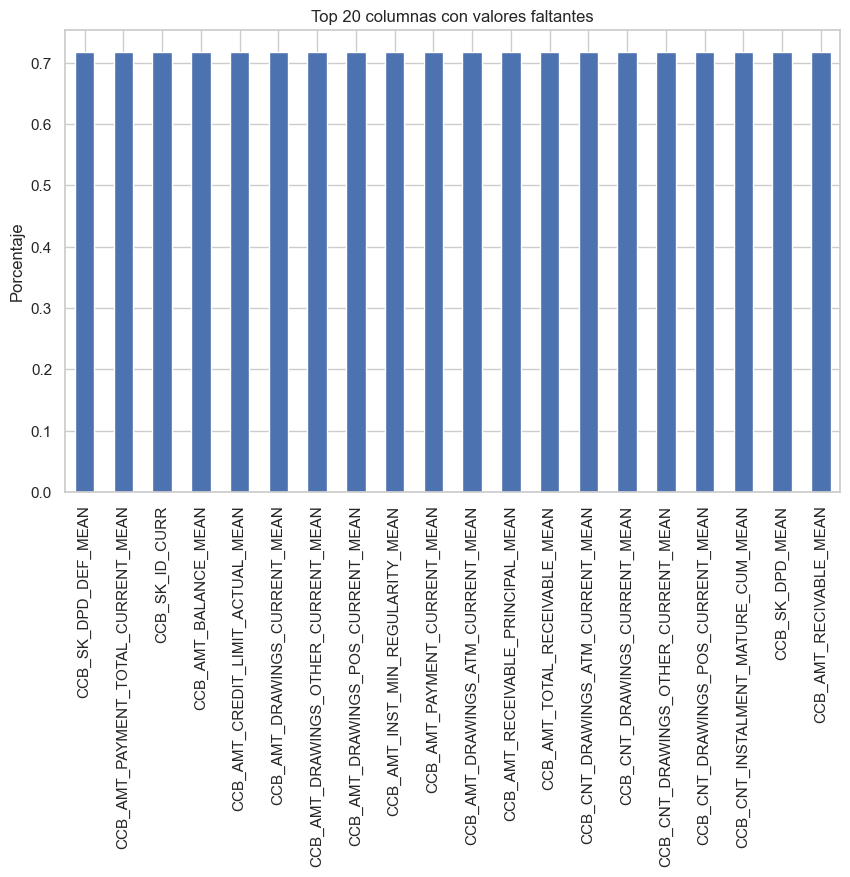

Sentinel DAYS_EMPLOYED=365243: 55374 casos


In [29]:
# Porcentaje de valores faltantes
missing = train.isnull().mean().sort_values(ascending=False)
missing_df = missing[missing > 0].to_frame('missing_pct')
print(missing_df.head(20))

# Visualización de los 20 principales
missing.head(20).plot(kind='bar')
plt.title('Top 20 columnas con valores faltantes')
plt.ylabel('Porcentaje')
plt.show()

# Sentinel: DAYS_EMPLOYED = 365243
if 'DAYS_EMPLOYED' in train.columns:
    sentinel_count = (train['DAYS_EMPLOYED'] == 365243).sum()
    print(f'Sentinel DAYS_EMPLOYED=365243: {sentinel_count} casos')


#### 4. Análisis univariado

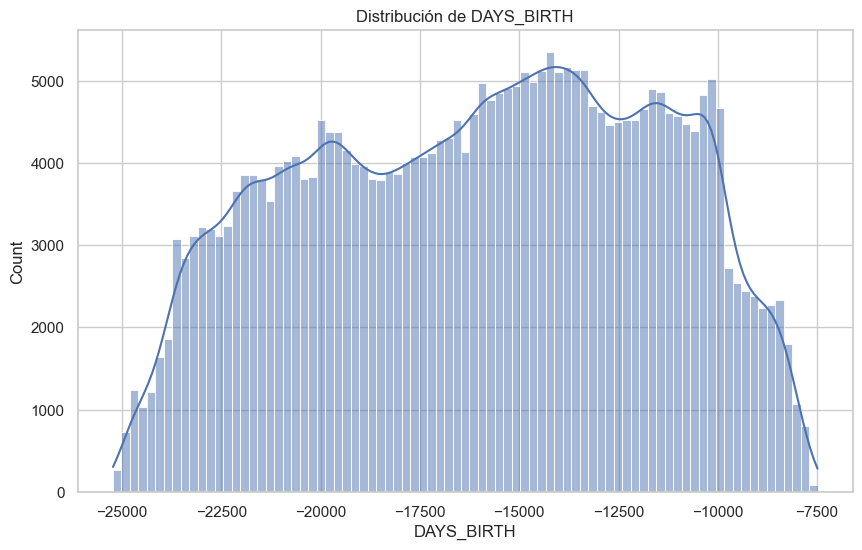

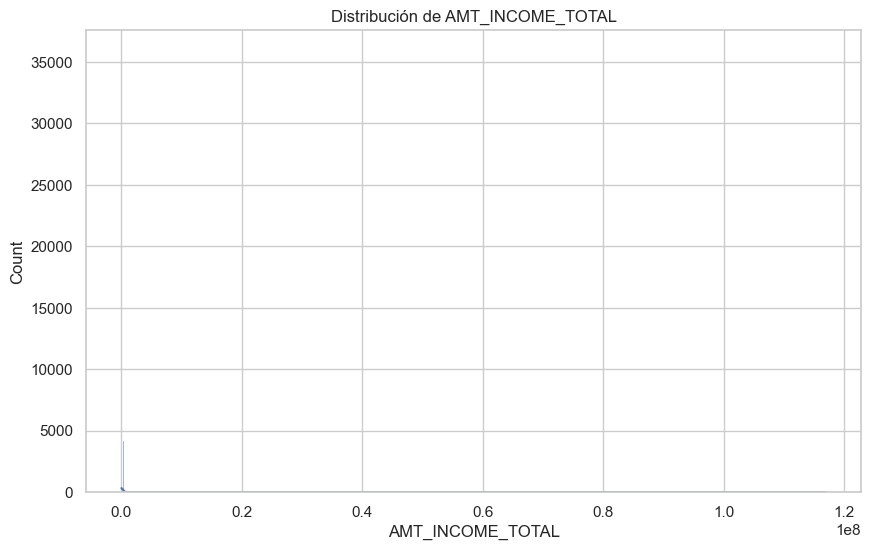

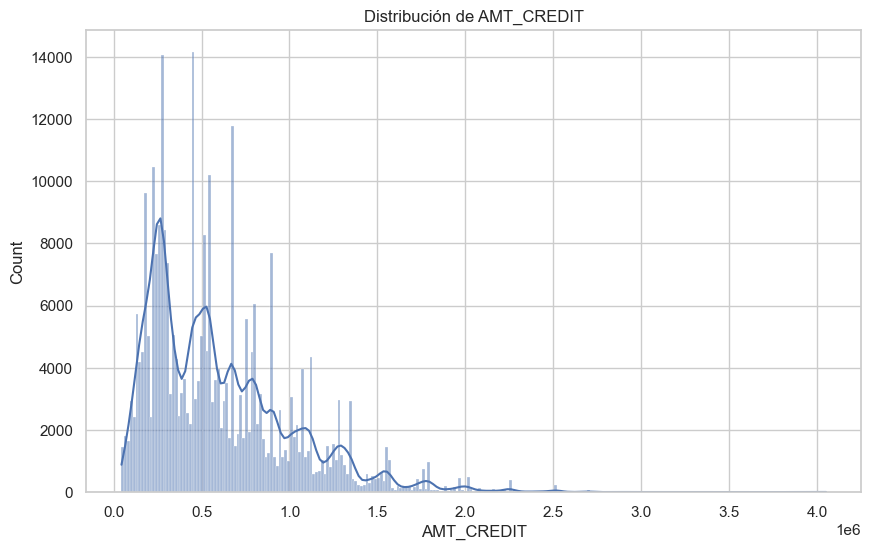

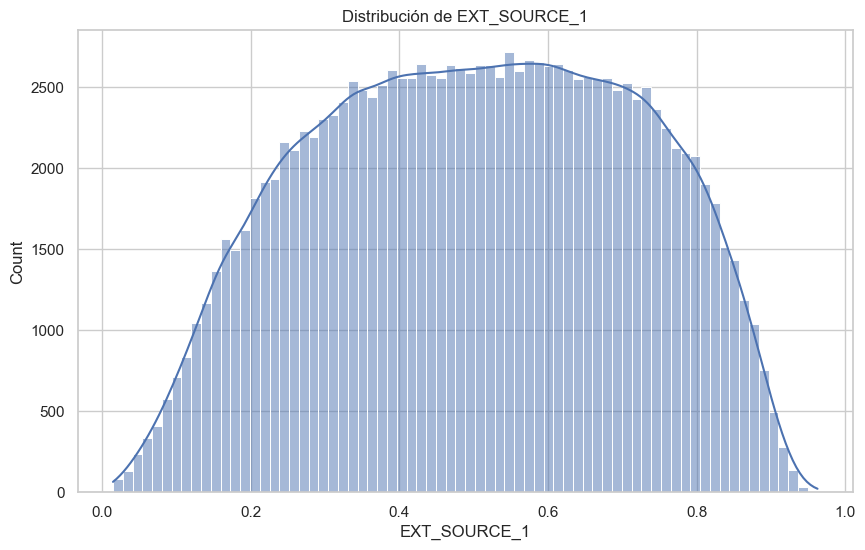

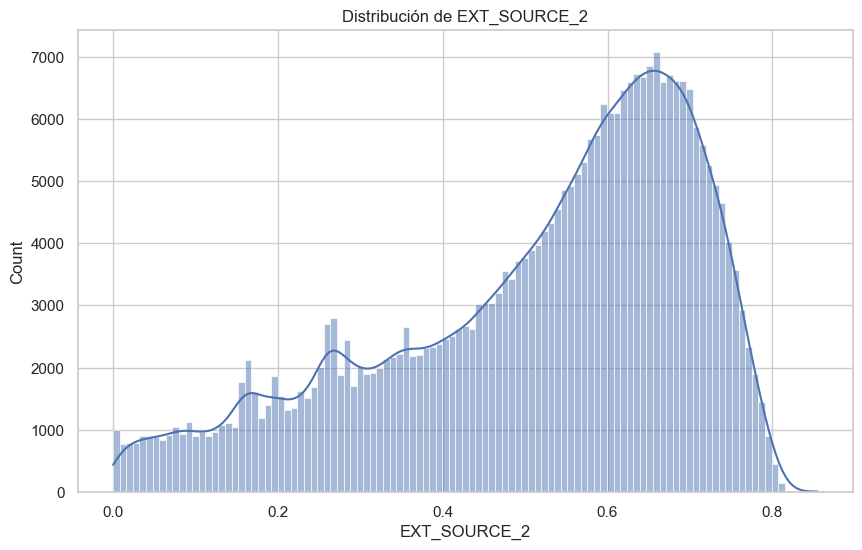

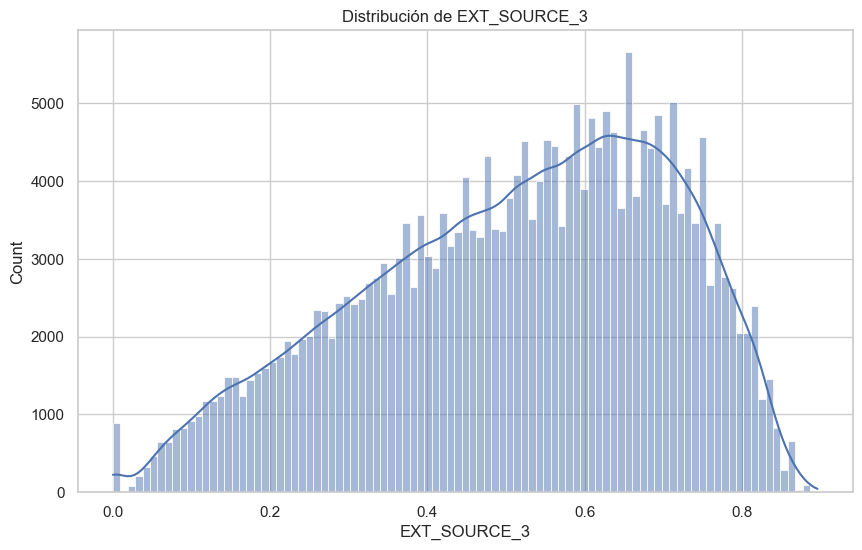

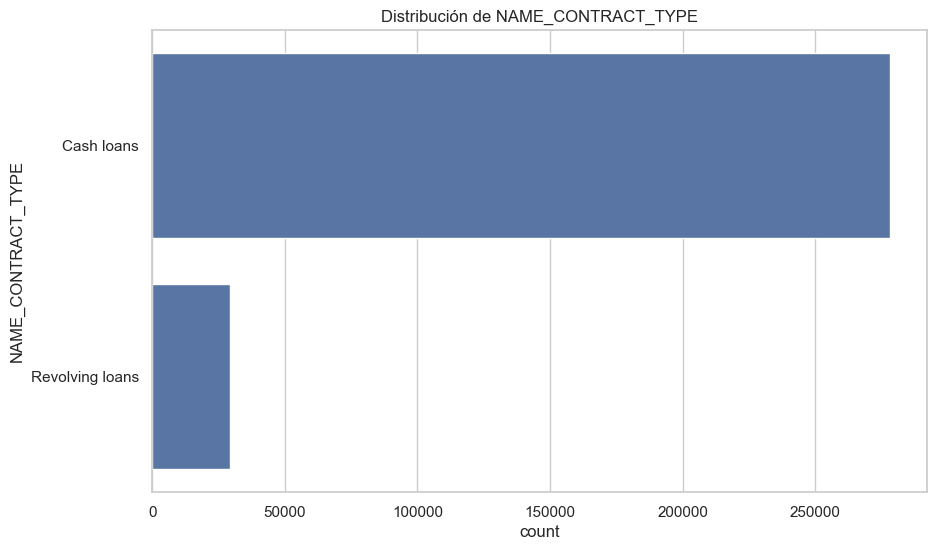

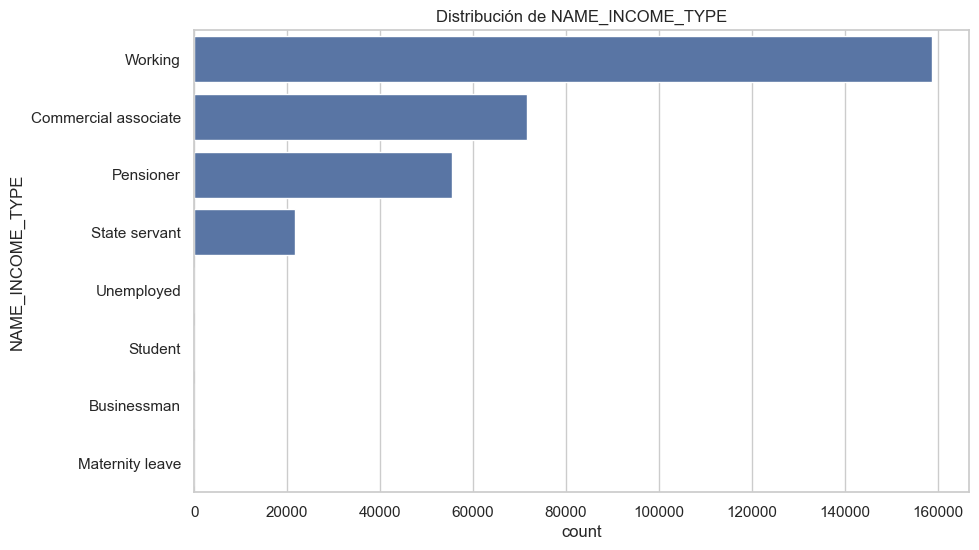

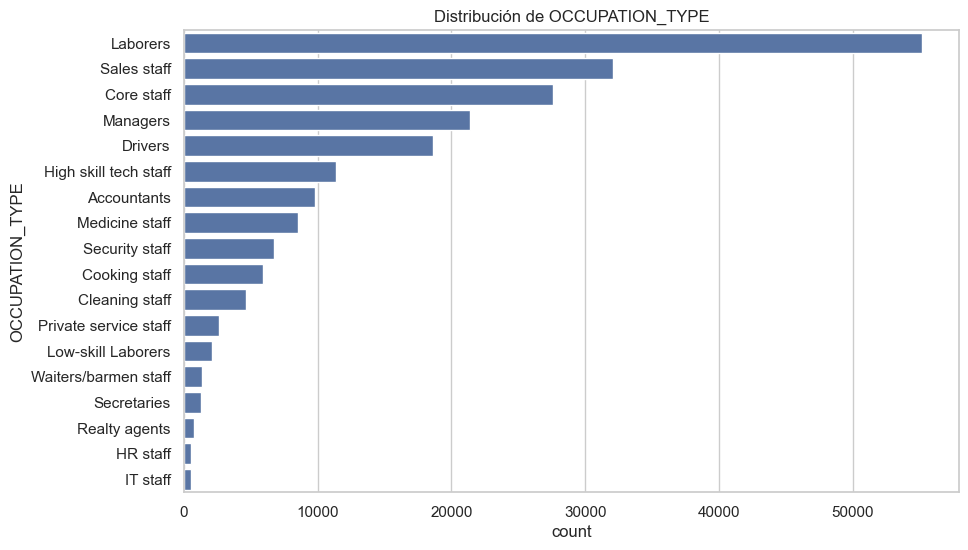

In [30]:
# Numéricas
num_features = ['DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for col in num_features:
    if col in train.columns:
        sns.histplot(train[col].dropna(), kde=True)
        plt.title(f'Distribución de {col}')
        plt.show()

# Categóricas
cat_features = ['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE']
for col in cat_features:
    if col in train.columns:
        sns.countplot(y=col, data=train, order=train[col].value_counts().index)
        plt.title(f'Distribución de {col}')
        plt.show()


#### 5. Análisis bivariado vs TARGET

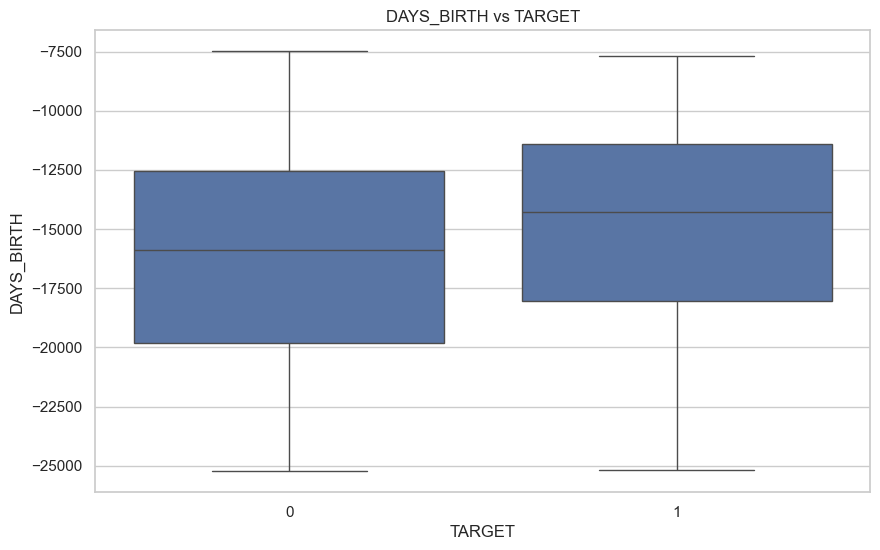

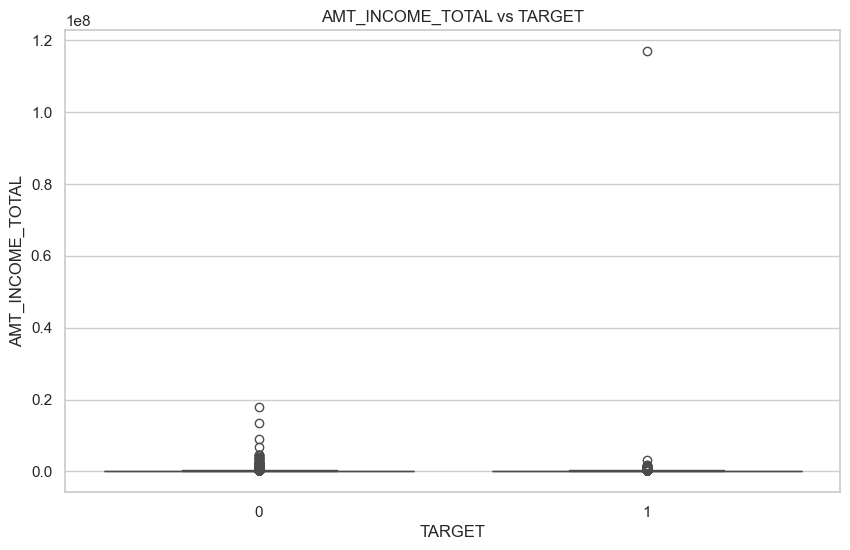

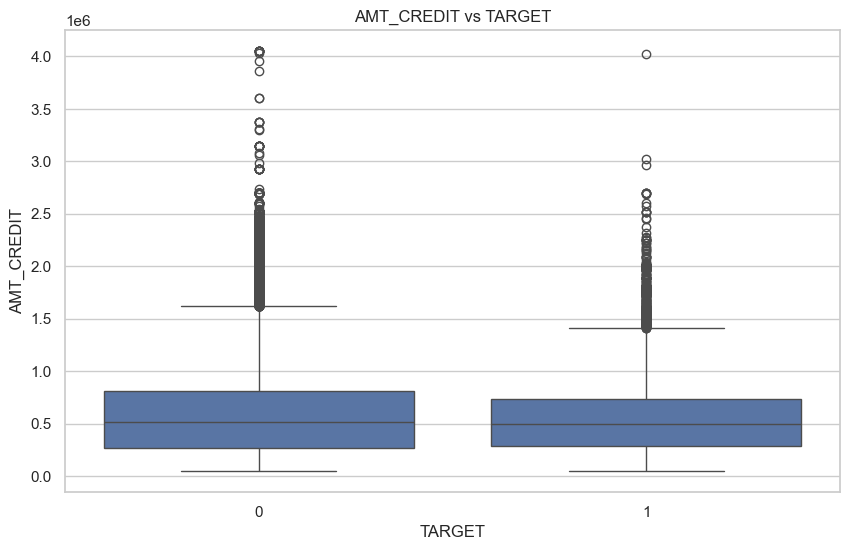

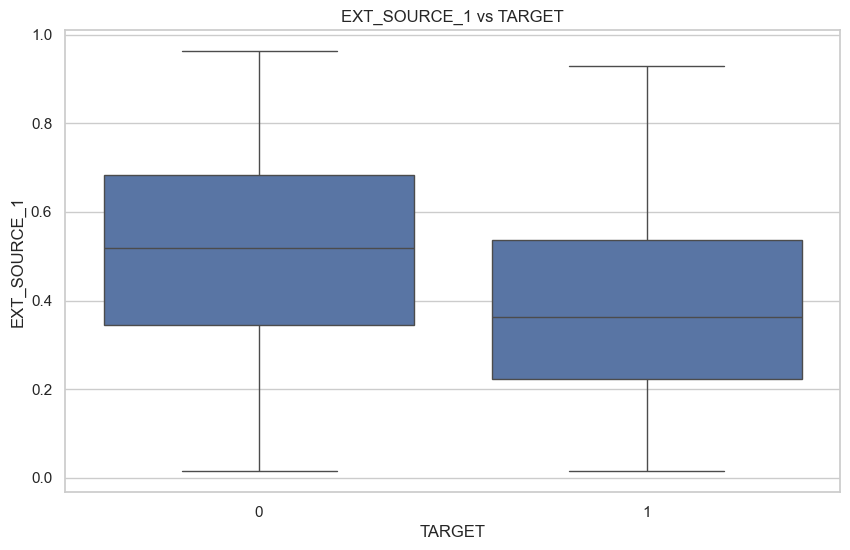

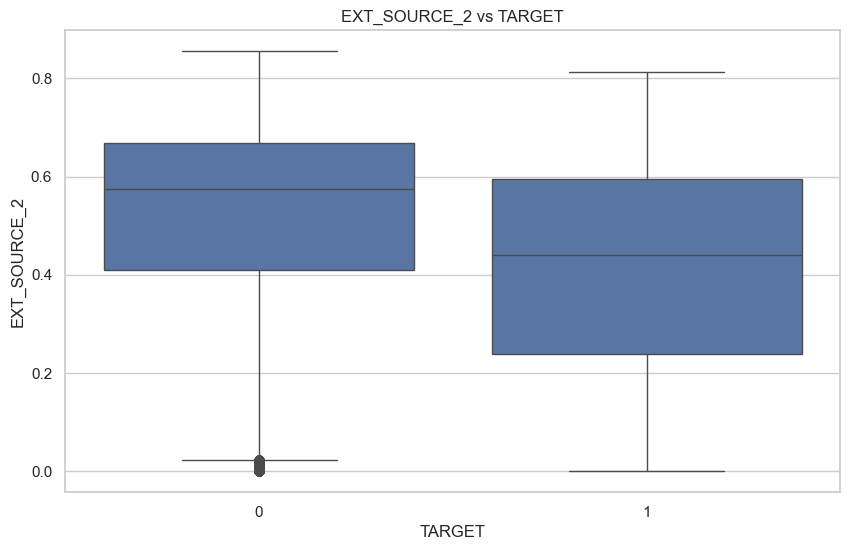

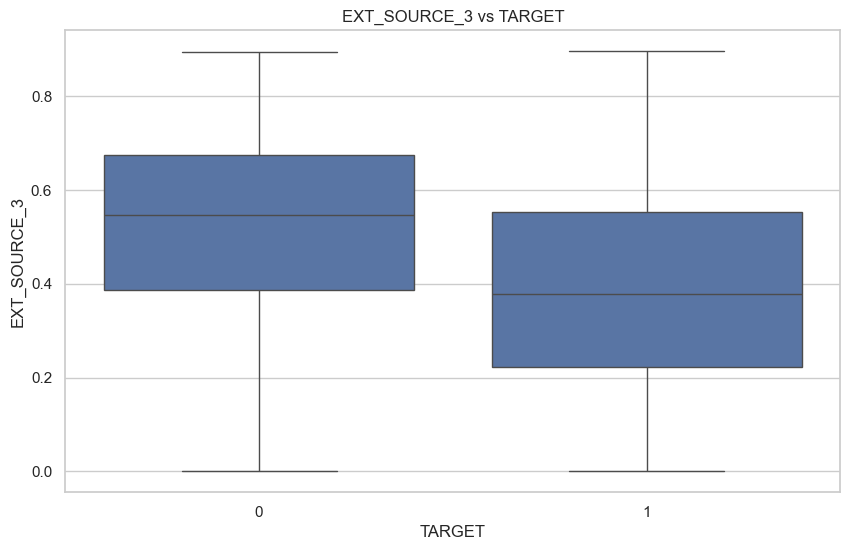

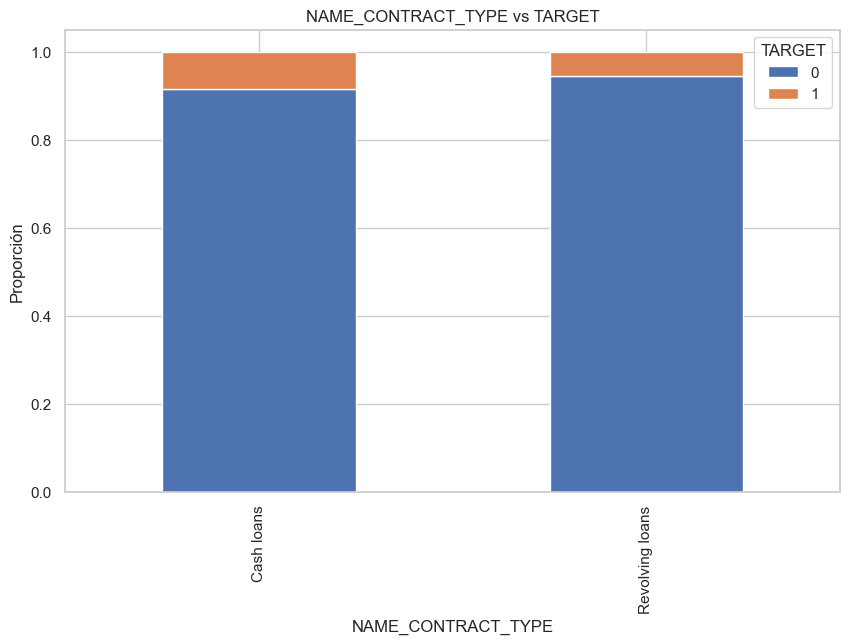

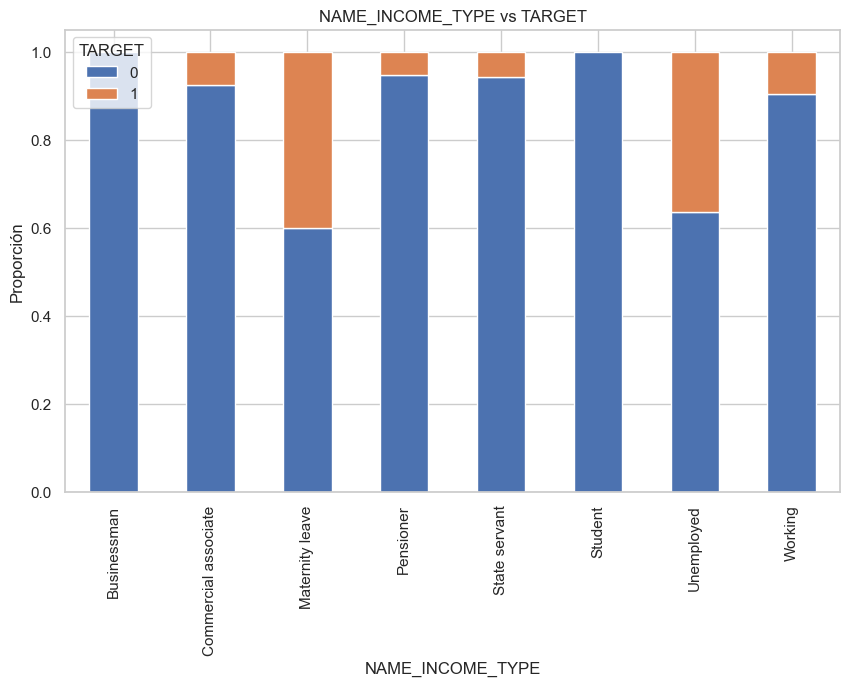

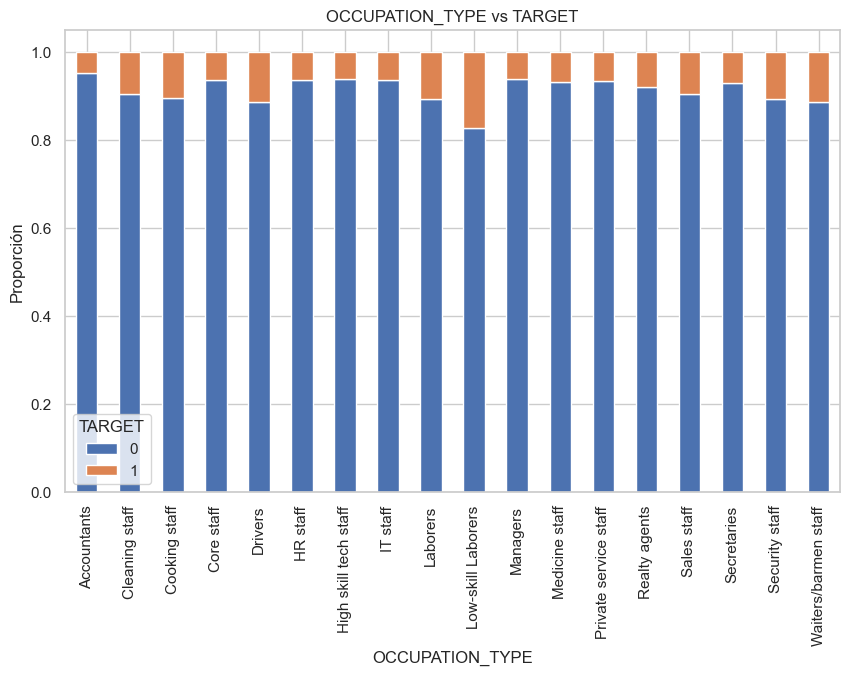

In [31]:
# Numéricas
for col in num_features:
    if col in train.columns:
        sns.boxplot(x='TARGET', y=col, data=train)
        plt.title(f'{col} vs TARGET')
        plt.show()

# Categóricas
for col in cat_features:
    if col in train.columns:
        ct = pd.crosstab(train[col], train['TARGET'], normalize='index')
        ct.plot(kind='bar', stacked=True)
        plt.title(f'{col} vs TARGET')
        plt.ylabel('Proporción')
        plt.show()

#### 6. Análisis de correlación

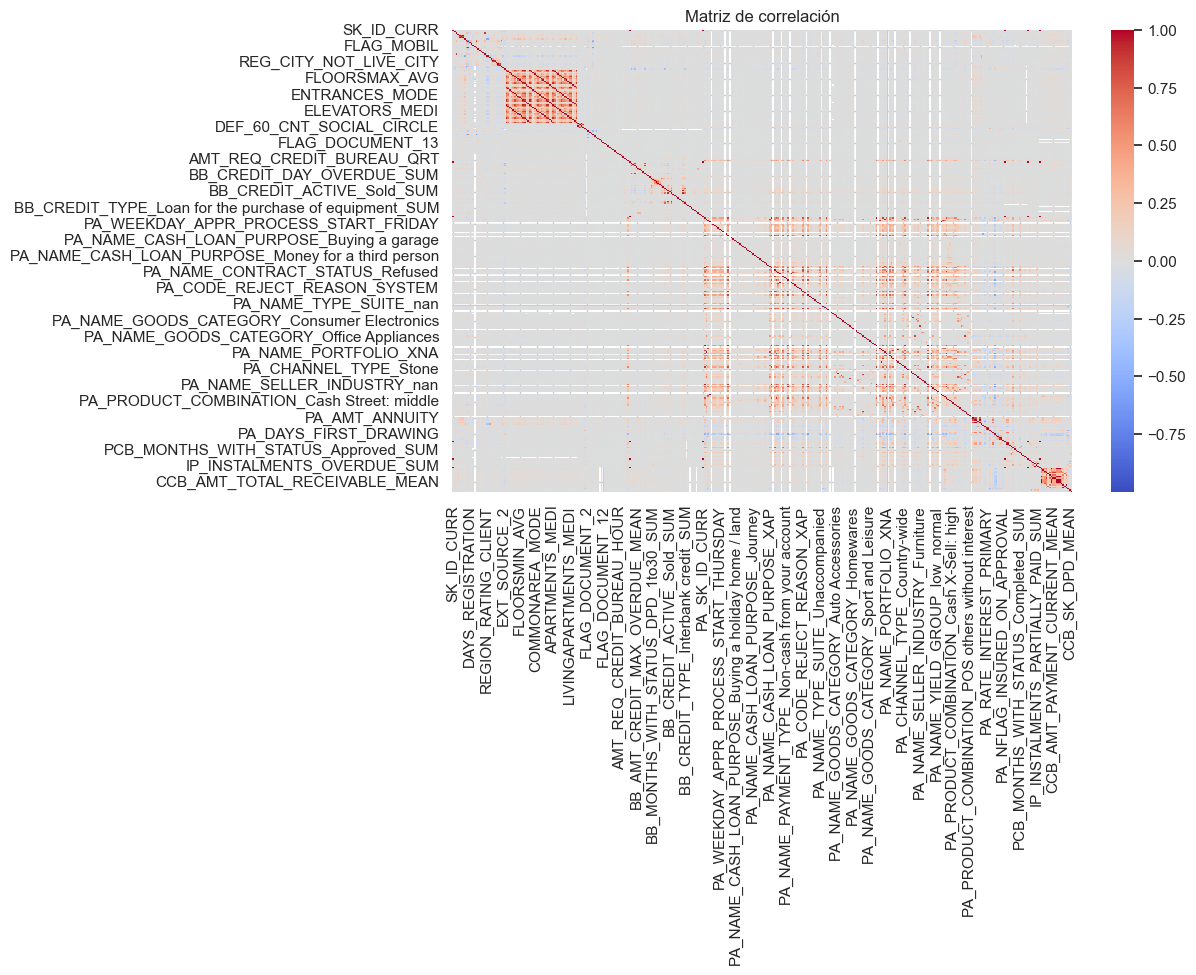

Top 15 correlaciones con TARGET:
EXT_SOURCE_3                         0.178919
EXT_SOURCE_2                         0.160472
EXT_SOURCE_1                         0.155317
CCB_CNT_DRAWINGS_ATM_CURRENT_MEAN    0.117815
BB_DAYS_CREDIT_MEAN                  0.089729
CCB_AMT_BALANCE_MEAN                 0.087177
CCB_AMT_TOTAL_RECEIVABLE_MEAN        0.086490
CCB_AMT_RECIVABLE_MEAN               0.086478
CCB_AMT_RECEIVABLE_PRINCIPAL_MEAN    0.086062
CCB_CNT_DRAWINGS_CURRENT_MEAN        0.082520
DAYS_BIRTH                           0.078239
BB_DAYS_ENDDATE_FACT_MEAN            0.077990
CCB_AMT_DRAWINGS_ATM_CURRENT_MEAN    0.077099
CCB_AMT_INST_MIN_REGULARITY_MEAN     0.075017
BB_DAYS_CREDIT_UPDATE_MEAN           0.068927
Name: TARGET, dtype: float64


In [32]:
# Matriz de correlación
corr = train[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Matriz de correlación')
plt.show()

# Top correlaciones con TARGET
if 'TARGET' in corr.columns:
    top_corr = corr['TARGET'].abs().sort_values(ascending=False)[1:16]
    print('Top 15 correlaciones con TARGET:')
    print(top_corr)


#### 7. Feature Engineering Preview

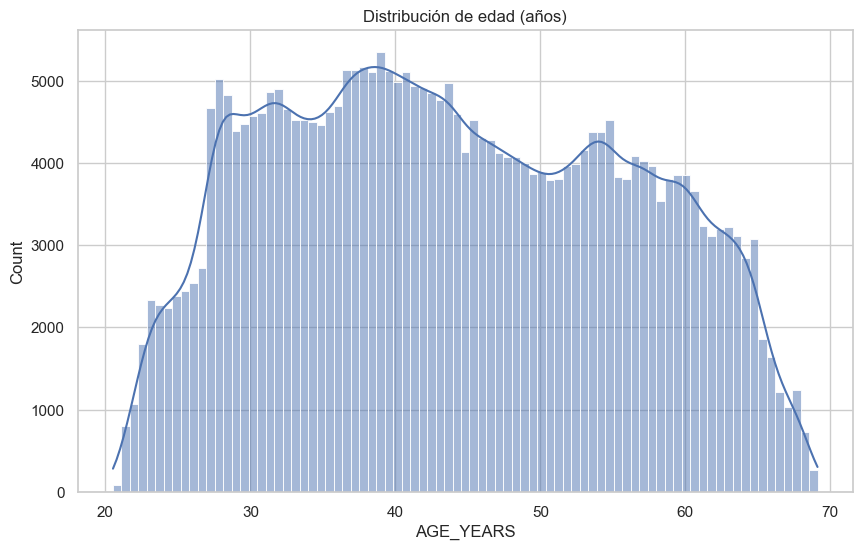

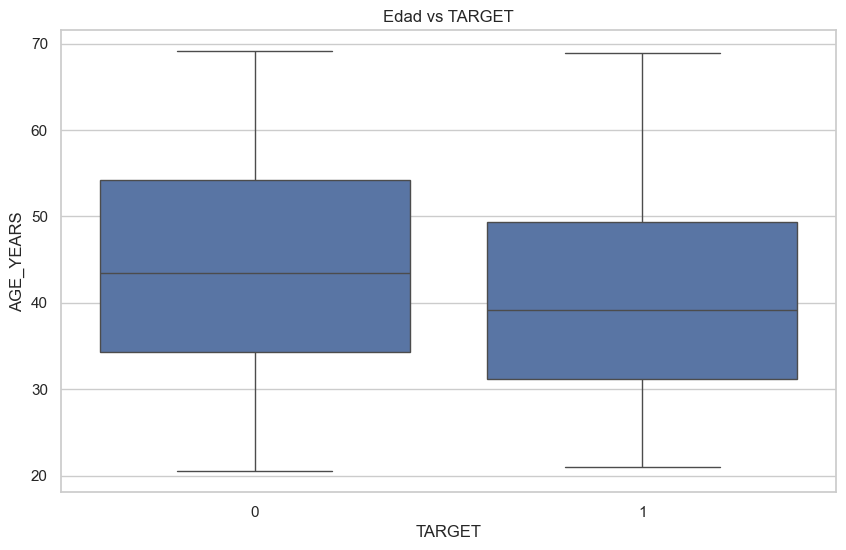

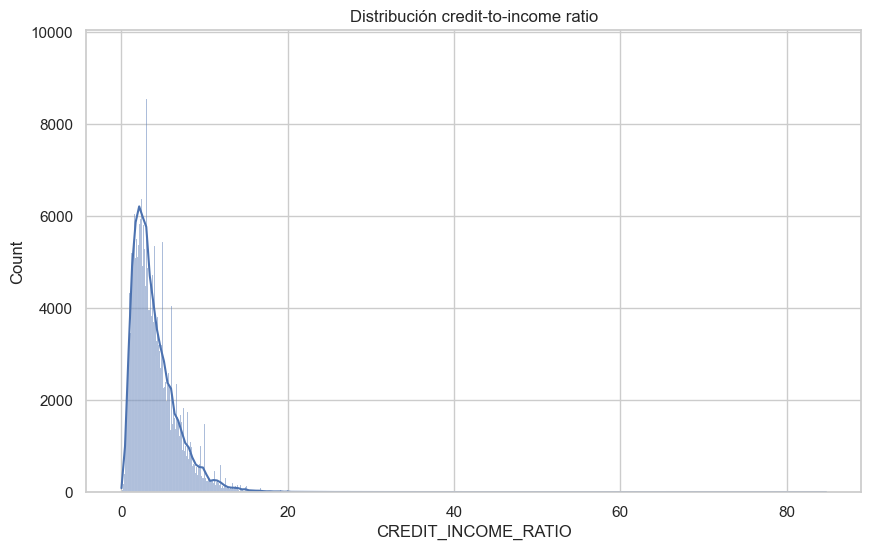

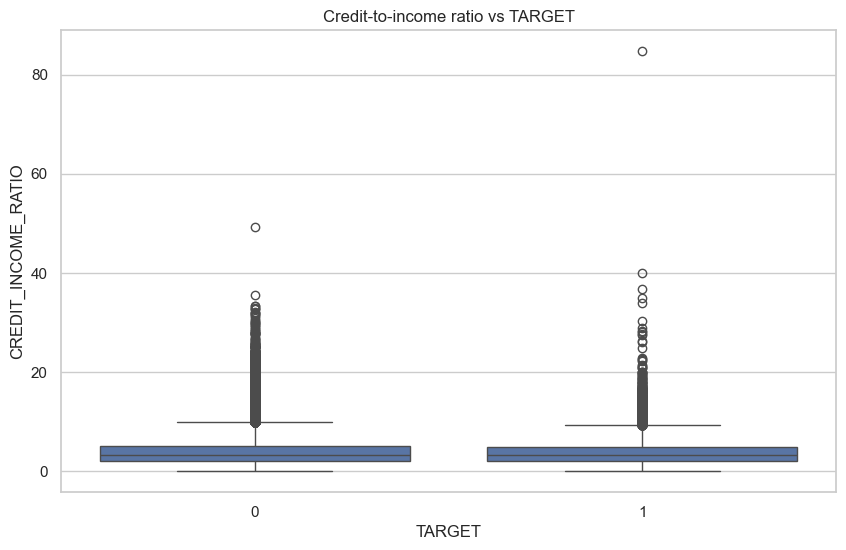

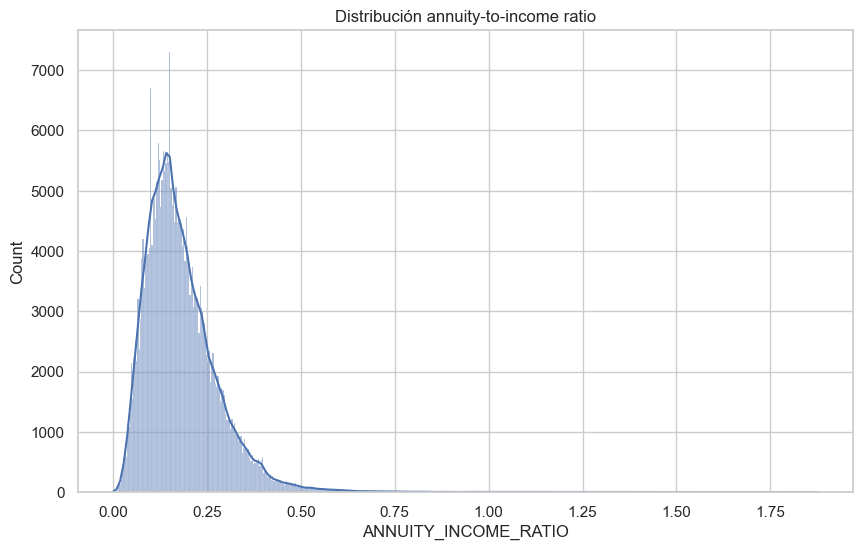

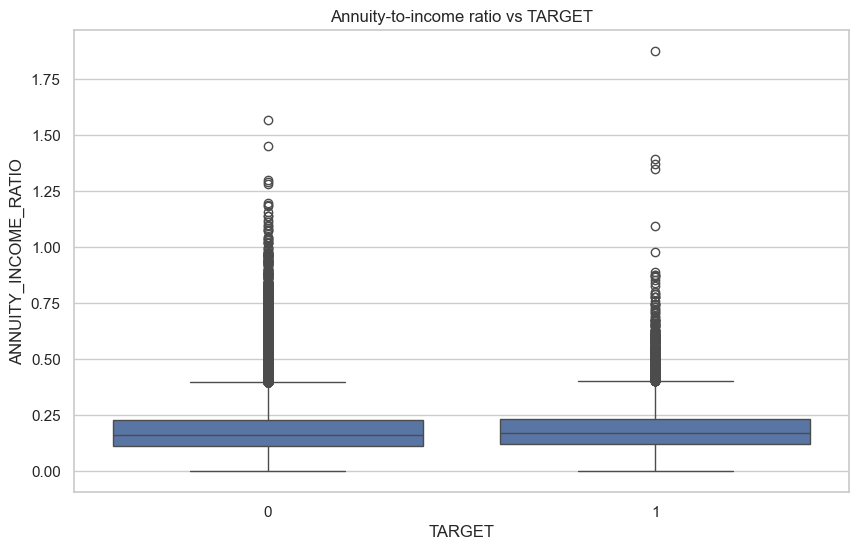

In [33]:
# Edad en años
if 'DAYS_BIRTH' in train.columns:
    train['AGE_YEARS'] = -train['DAYS_BIRTH'] / 365
    sns.histplot(train['AGE_YEARS'], kde=True)
    plt.title('Distribución de edad (años)')
    plt.show()
    sns.boxplot(x='TARGET', y='AGE_YEARS', data=train)
    plt.title('Edad vs TARGET')
    plt.show()

# Credit-to-income ratio
if 'AMT_CREDIT' in train.columns and 'AMT_INCOME_TOTAL' in train.columns:
    train['CREDIT_INCOME_RATIO'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
    sns.histplot(train['CREDIT_INCOME_RATIO'], kde=True)
    plt.title('Distribución credit-to-income ratio')
    plt.show()
    sns.boxplot(x='TARGET', y='CREDIT_INCOME_RATIO', data=train)
    plt.title('Credit-to-income ratio vs TARGET')
    plt.show()

# Annuity-to-income ratio
if 'AMT_ANNUITY' in train.columns and 'AMT_INCOME_TOTAL' in train.columns:
    train['ANNUITY_INCOME_RATIO'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']
    sns.histplot(train['ANNUITY_INCOME_RATIO'], kde=True)
    plt.title('Distribución annuity-to-income ratio')
    plt.show()
    sns.boxplot(x='TARGET', y='ANNUITY_INCOME_RATIO', data=train)
    plt.title('Annuity-to-income ratio vs TARGET')
    plt.show()


#### 8. Outlier Detection & Visualization

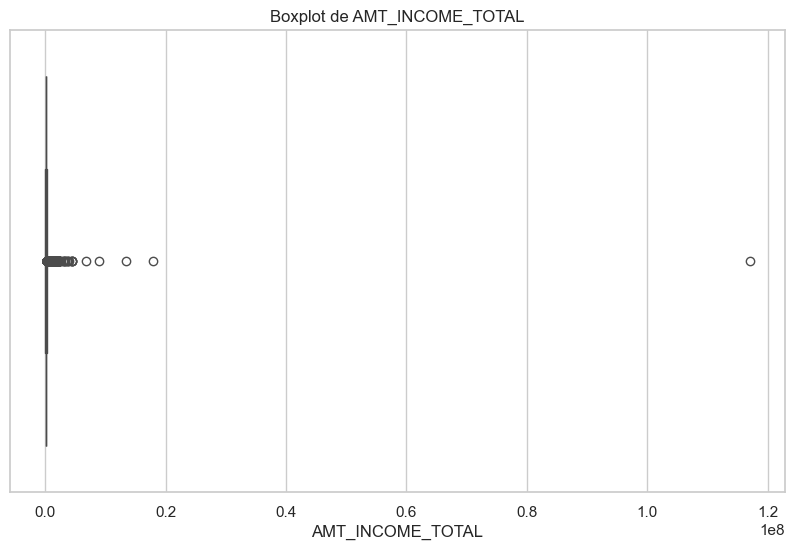

Outliers en AMT_INCOME_TOTAL: 14035 casos


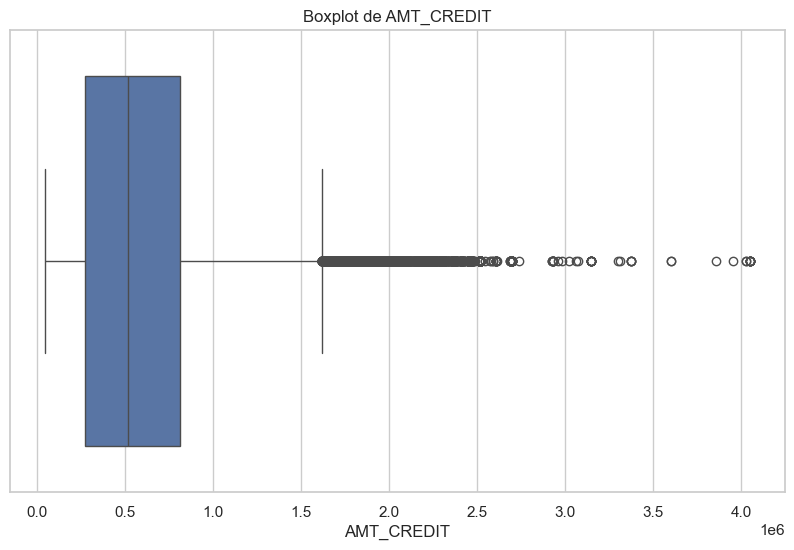

Outliers en AMT_CREDIT: 6562 casos


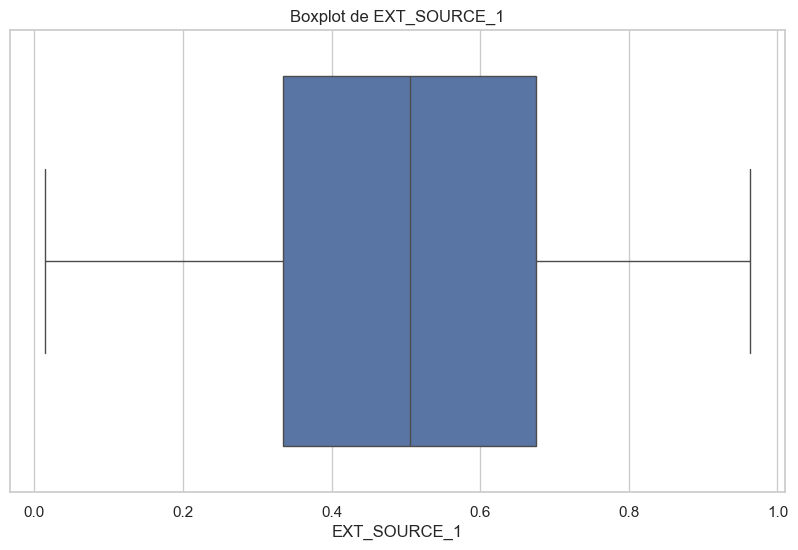

Outliers en EXT_SOURCE_1: 0 casos


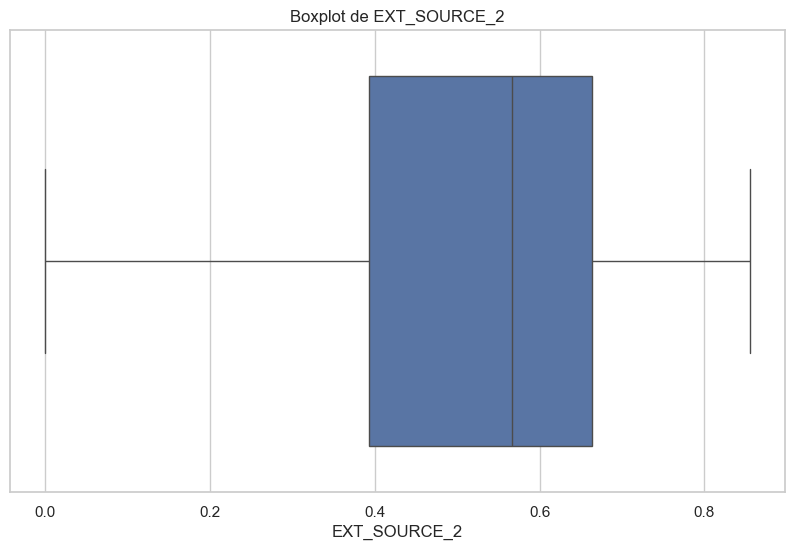

Outliers en EXT_SOURCE_2: 0 casos


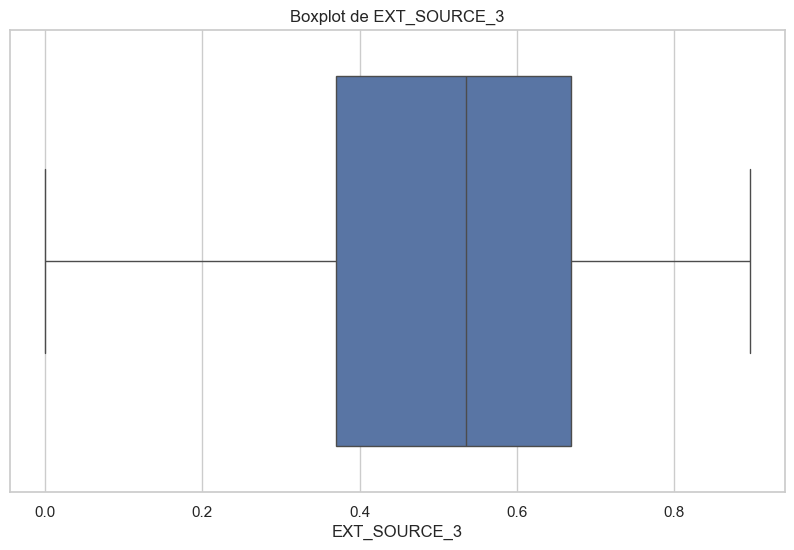

Outliers en EXT_SOURCE_3: 0 casos


In [34]:
from scipy.stats import iqr
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    if col in train.columns:
        sns.boxplot(x=train[col].dropna())
        plt.title(f'Boxplot de {col}')
        plt.show()
        q1 = train[col].quantile(0.25)
        q3 = train[col].quantile(0.75)
        iqr_val = iqr(train[col].dropna())
        outliers = ((train[col] < (q1 - 1.5*iqr_val)) | (train[col] > (q3 + 1.5*iqr_val))).sum()
        print(f'Outliers en {col}: {outliers} casos')


#### 9. Distribución por TARGET (KDE)

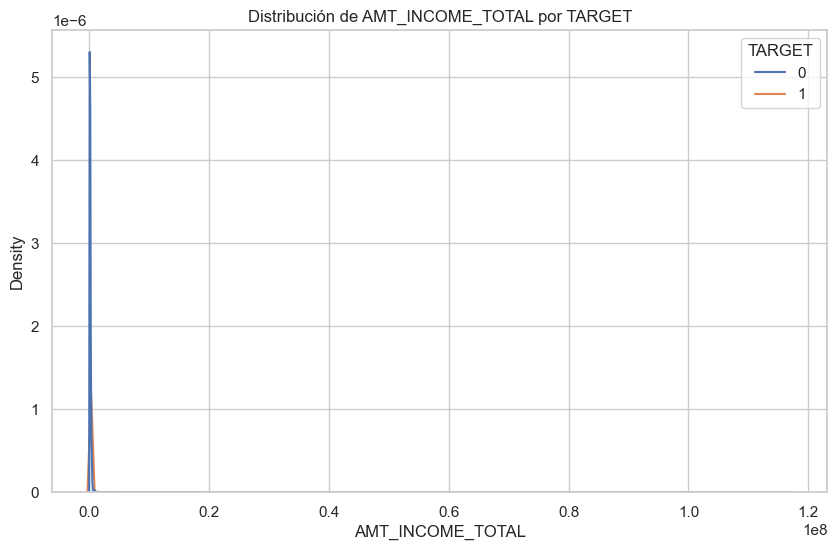

Insight: La forma de la distribución varía entre grupos TARGET.


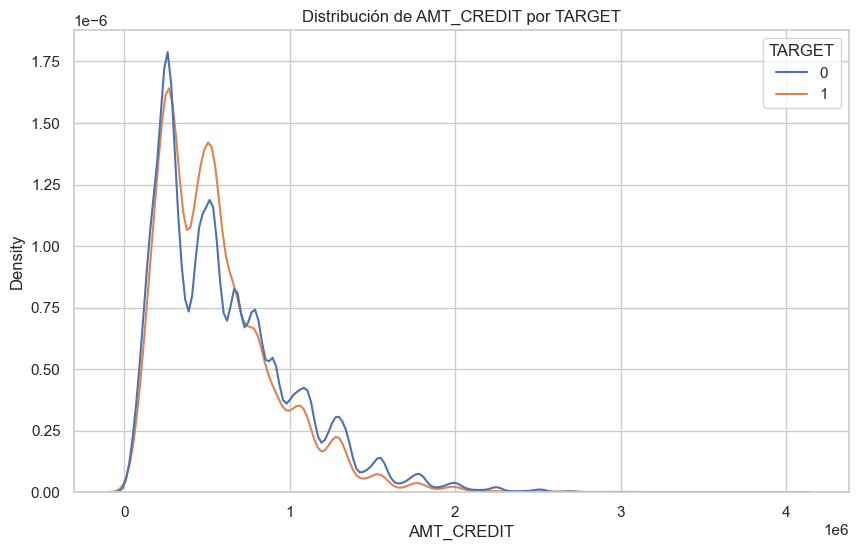

Insight: La forma de la distribución varía entre grupos TARGET.


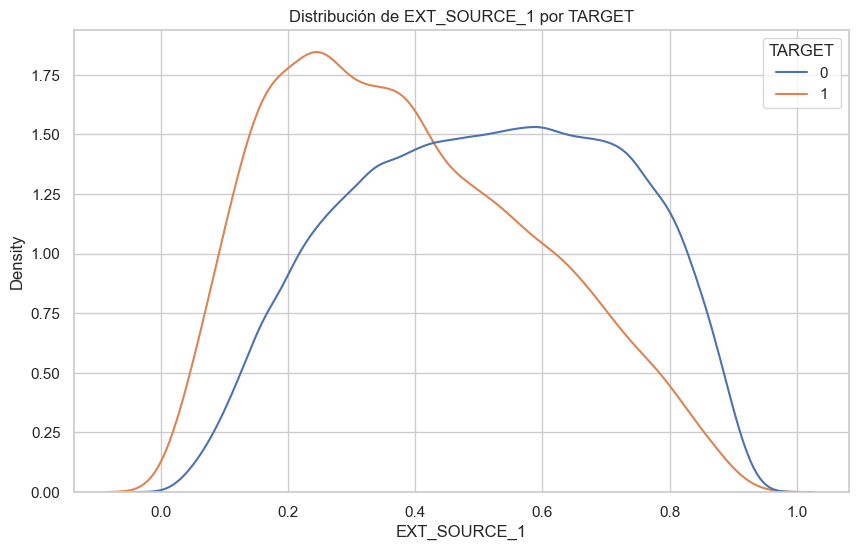

Insight: La forma de la distribución varía entre grupos TARGET.


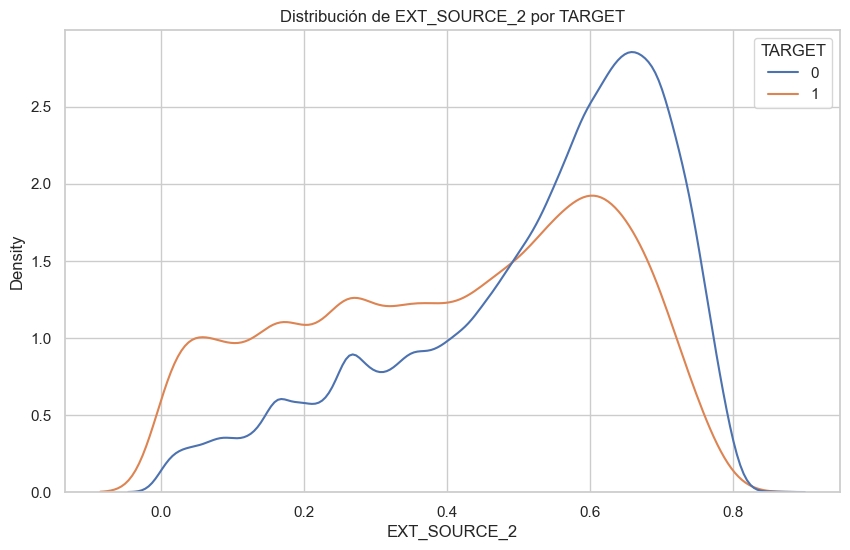

Insight: La forma de la distribución varía entre grupos TARGET.


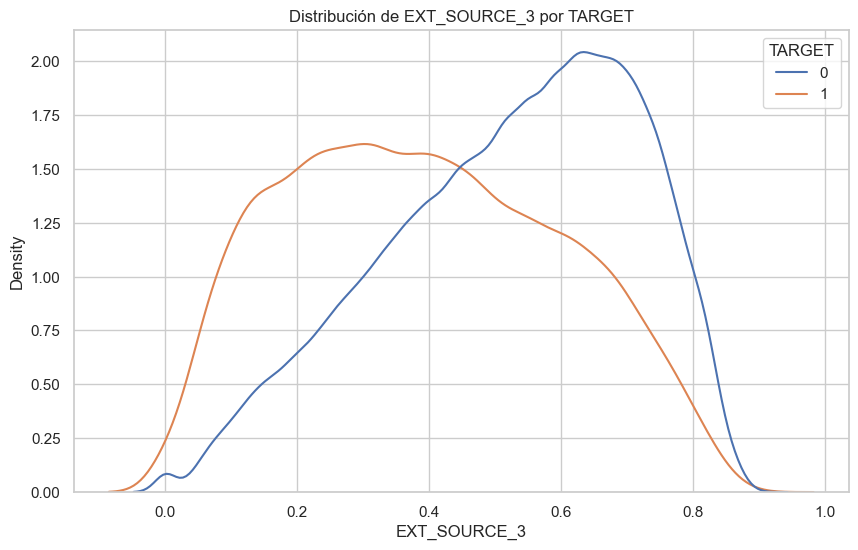

Insight: La forma de la distribución varía entre grupos TARGET.


In [35]:
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    if col in train.columns:
        sns.kdeplot(data=train, x=col, hue='TARGET', common_norm=False)
        plt.title(f'Distribución de {col} por TARGET')
        plt.show()
        print(f'Insight: La forma de la distribución varía entre grupos TARGET.')


#### 10. Interacción de variables categóricas

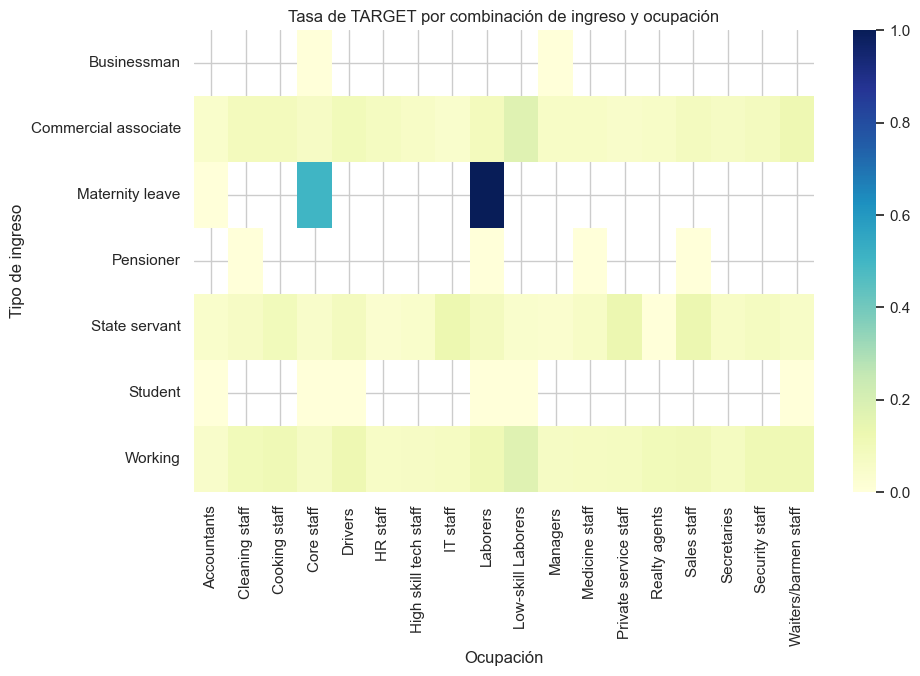

In [36]:
if 'NAME_INCOME_TYPE' in train.columns and 'OCCUPATION_TYPE' in train.columns:
    pivot = pd.crosstab(train['NAME_INCOME_TYPE'], train['OCCUPATION_TYPE'], values=train['TARGET'], aggfunc='mean')
    sns.heatmap(pivot, cmap='YlGnBu')
    plt.title('Tasa de TARGET por combinación de ingreso y ocupación')
    plt.xlabel('Ocupación')
    plt.ylabel('Tipo de ingreso')
    plt.show()


#### 11. Feature Engineering Avanzado

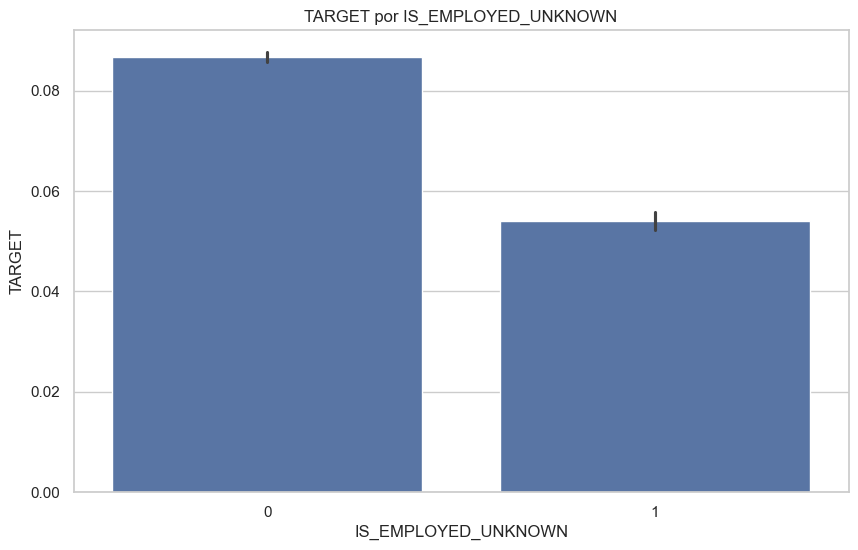

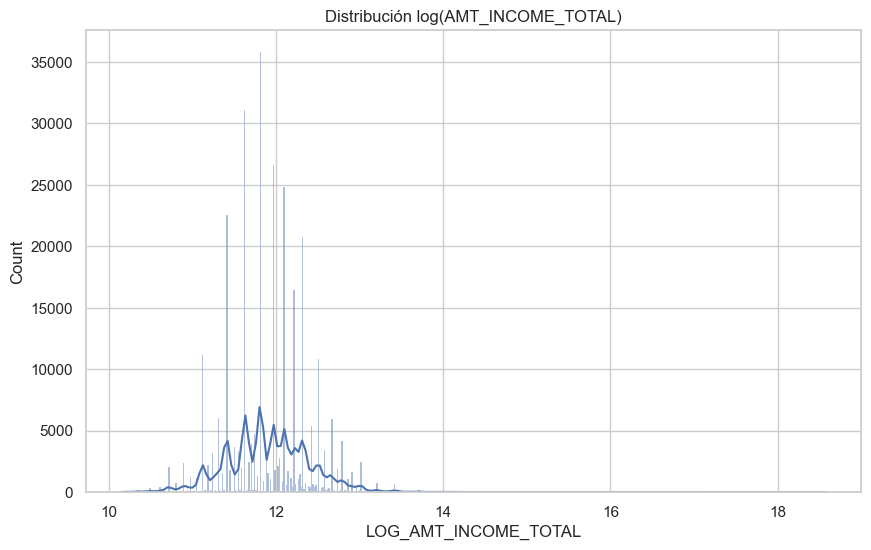

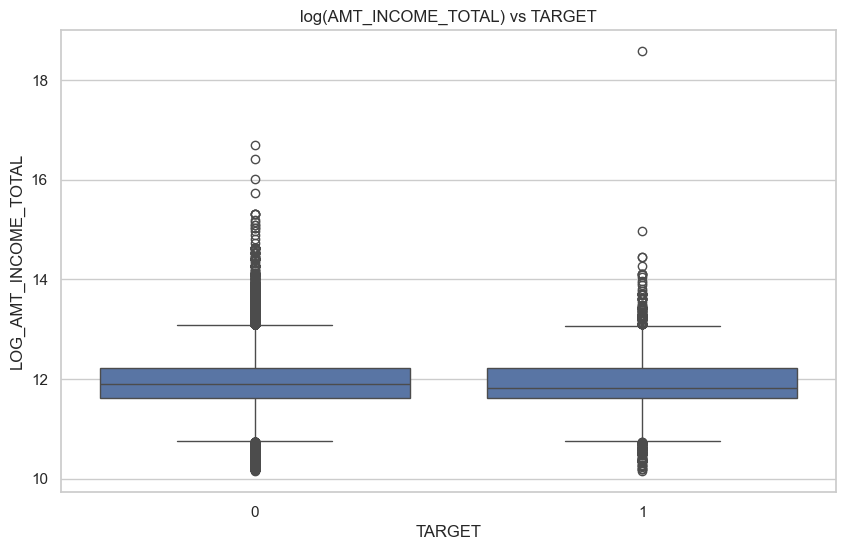

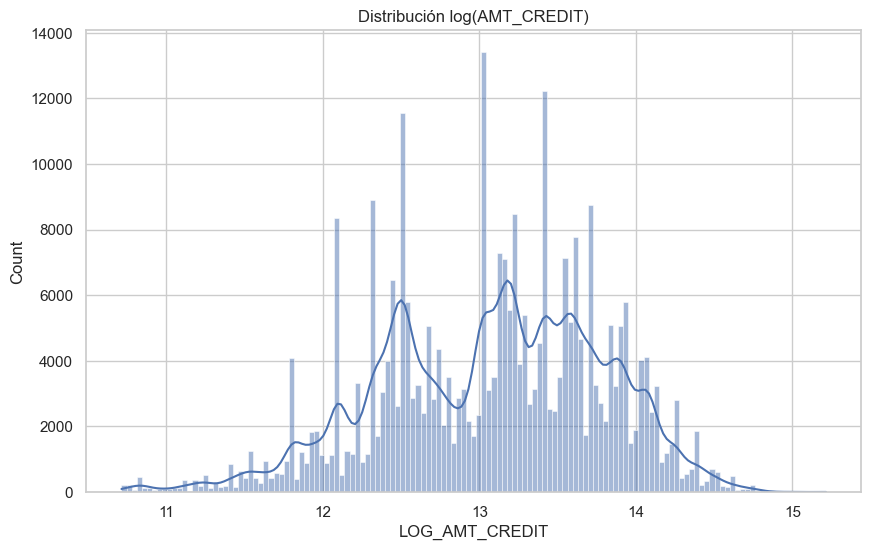

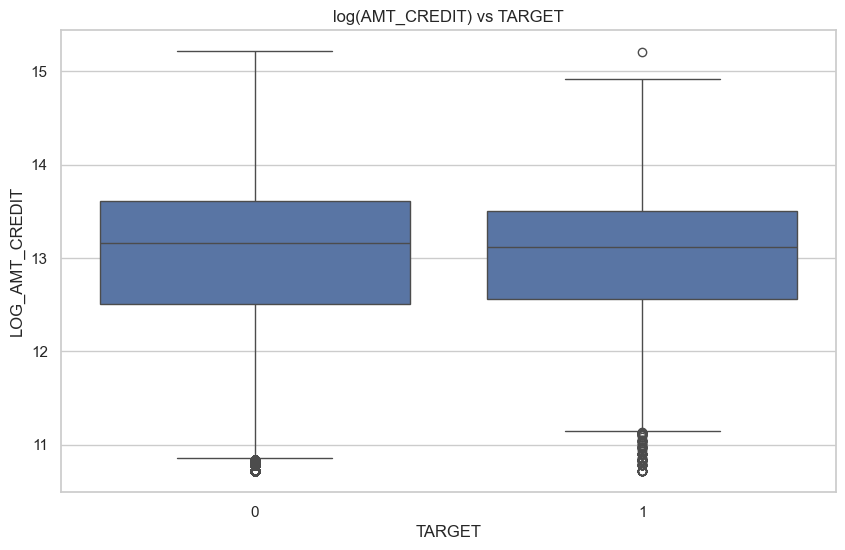

In [37]:
# Sentinel binario
if 'DAYS_EMPLOYED' in train.columns:
    train['IS_EMPLOYED_UNKNOWN'] = (train['DAYS_EMPLOYED'] == 365243).astype(int)
    sns.barplot(x='IS_EMPLOYED_UNKNOWN', y='TARGET', data=train)
    plt.title('TARGET por IS_EMPLOYED_UNKNOWN')
    plt.show()

# Log-transform
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT']:
    if col in train.columns:
        train[f'LOG_{col}'] = np.log1p(train[col])
        sns.histplot(train[f'LOG_{col}'], kde=True)
        plt.title(f'Distribución log({col})')
        plt.show()
        sns.boxplot(x='TARGET', y=f'LOG_{col}', data=train)
        plt.title(f'log({col}) vs TARGET')
        plt.show()
